<a href="https://colab.research.google.com/github/h3lmii/h3lmi/blob/main/faceRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
import face_recognition
import os
from google.colab.patches import cv2_imshow


In [ ]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

In [29]:
imgs=[]
known_encodings = []
known_names = []
known_dir = '/content/sample_data/players'
for file in os.listdir(known_dir):
    img = cv2.imread(known_dir + '/' + file)
    imgs.append(img)
    img_enc = face_recognition.face_encodings(img)[0]

    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])


In [30]:
known_names

['heni', 'louay', 'helmi', 'hassen', 'melek']

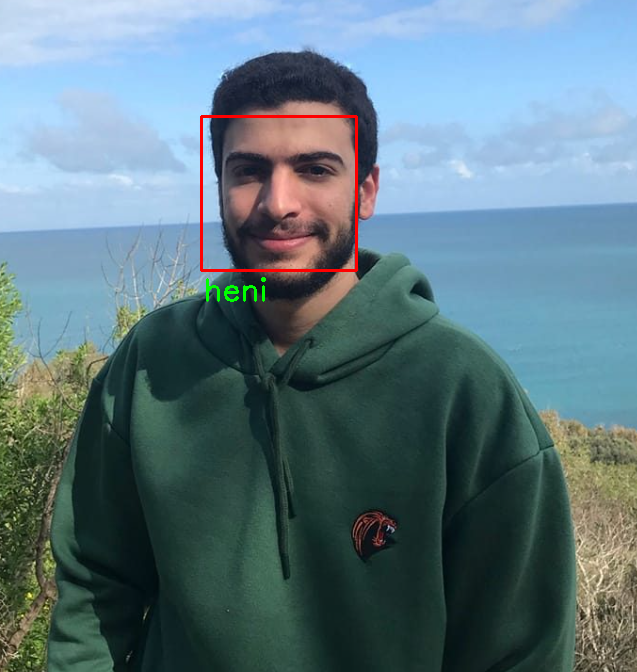

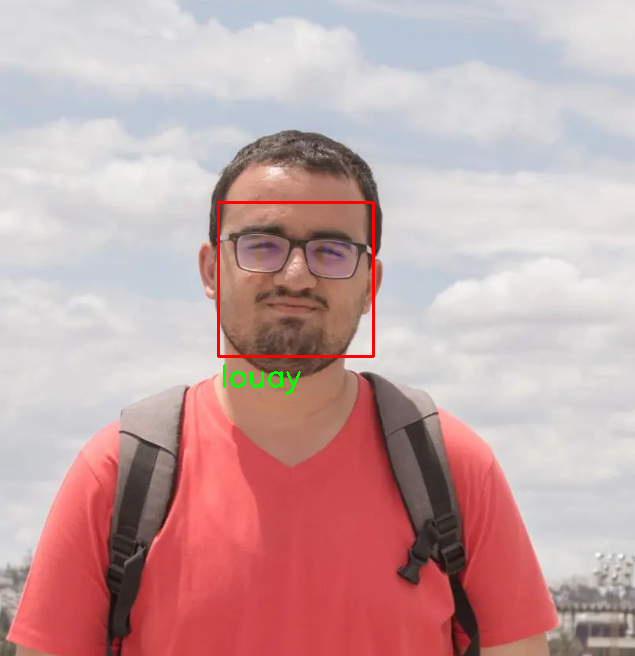

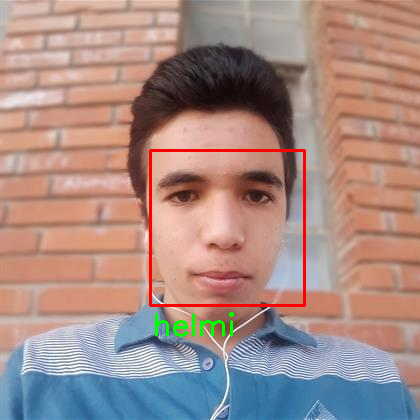

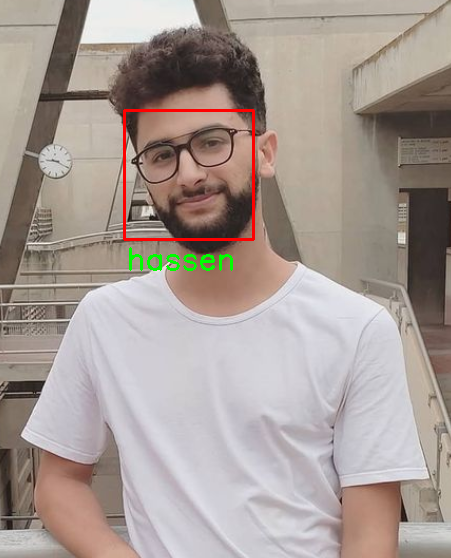

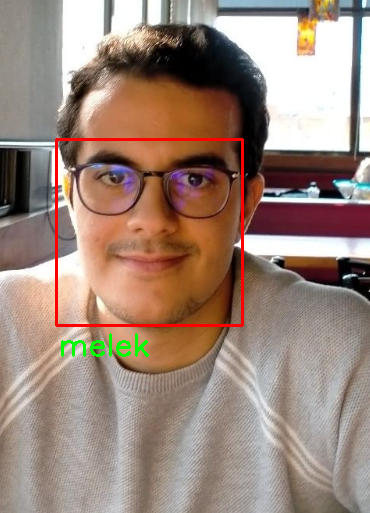

In [31]:
for i in range(len(known_names)):

  name = known_names[i]
  (top, right, bottom, left) = face_recognition.face_locations(imgs[i])[0]
  cv2.rectangle(imgs[i], (left, top), (right, bottom), (0, 0, 255), 2)
  cv2.putText(imgs[i], name, (left+2, bottom+30), cv2.LINE_AA, 1, (0, 255, 0), 2)
  cv2_imshow(imgs[i])

In [12]:
import sys




In [37]:
imgtest = cv2.imread('/content/test.PNG')
img_enc_test = face_recognition.face_encodings(imgtest)[0]


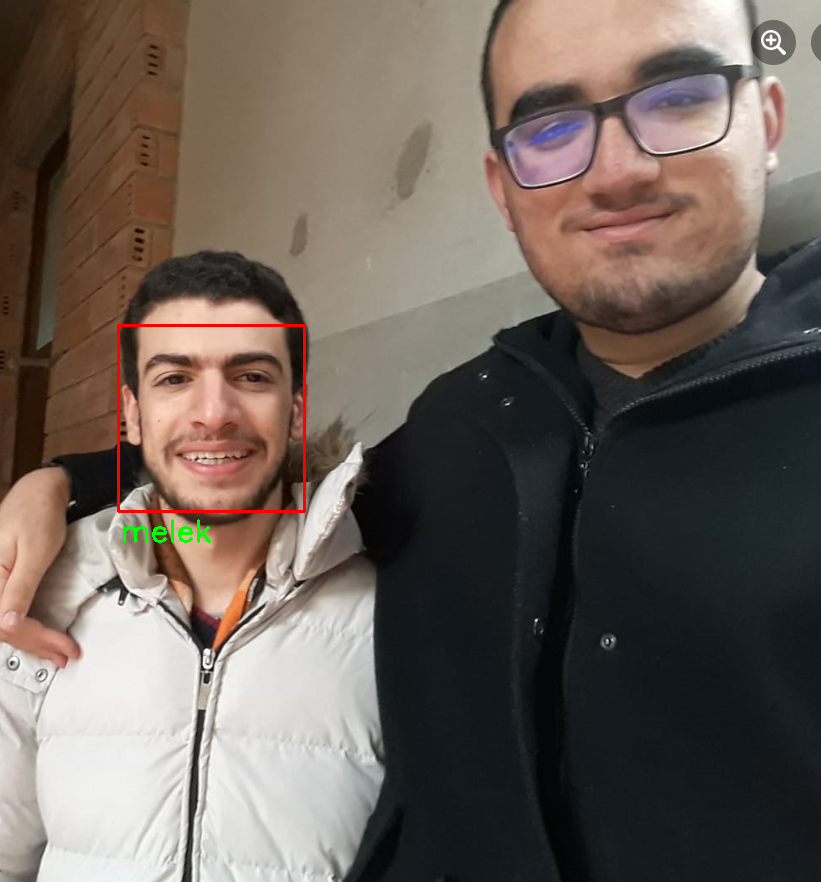

In [36]:
name ='melek'
(top1, right1, bottom1, left1) = face_recognition.face_locations(imgtest)[0]
cv2.rectangle(imgtest, (left1, top1), (right1, bottom1), (0, 0, 255),2 )
cv2.putText(imgtest, name, (left1+2, bottom1+30), cv2.LINE_AA, 1, (0, 255, 0), 2)
cv2_imshow(imgtest)

In [ ]:
face_recognition.face_locations(imgtest)[0]

(86, 175, 176, 86)

In [38]:
results = face_recognition.compare_faces(known_encodings, img_enc_test)
dis = face_recognition.face_distance(known_encodings, img_enc_test)

results


[True, False, False, False, False]

In [39]:
dis

array([0.43467933, 0.65591309, 0.68796587, 0.65168669, 0.63503953])

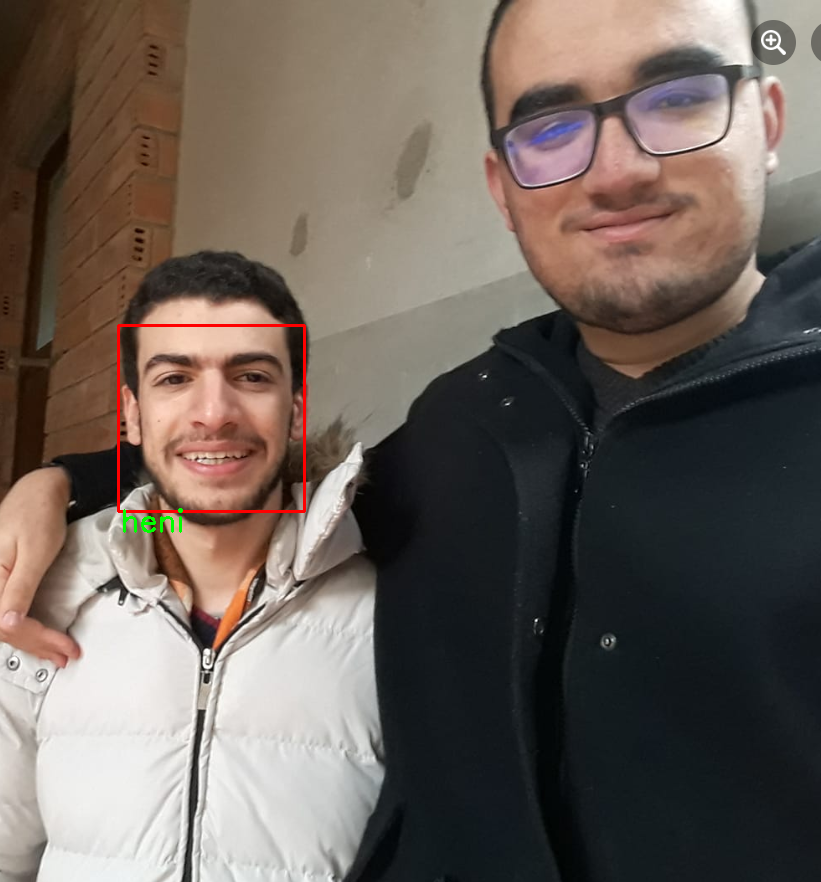

In [40]:
for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top1, right1, bottom1, left1) = face_recognition.face_locations(imgtest)[0]
            cv2.rectangle(imgtest, (left1, top1), (right1, bottom1), (0, 0, 255), 2)
            cv2.putText(imgtest, name, (left1+2, bottom1+20), cv2.LINE_AA, 1, (0, 255, 0), 2)
            cv2_imshow(imgtest)
